Name: Siddharth Byale

Github username : sidb98

USC ID : 5284615575

Late Days Used: 2 


In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Multi-class and Multi-Label Classification Using Support Vector Machines

a) Choose 70% of the data randomly as the training set.

In [11]:
df = pd.read_csv('../../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [12]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,:22], df.iloc[:,22:25]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
y["Family"].value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [14]:
y["Genus"].value_counts()

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

In [15]:
y["Species"].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

 ### b) 
 i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

 Ans)   
 1) Exact Match Ratio :  extends the concept of accuracy from the single-label classification problem to a multi-label classification problem.  

 2) Hamming Loss: Hamming Loss computes the proportion of incorrectly predicted labels to the total number of labels.  

 3) Hamming Score : 1- Hamming Loss


 reference : https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd


In [50]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
def hammingLoss(y_true, y_pred):
    return hamming_loss(y_true, y_pred)

def exactMatch(y_true,y_pred):
    correct = 0
    wrong = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct+=1
        else:
            wrong+=1
    return (correct/(correct+wrong))


ii)  Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [17]:
y_train_family, y_train_genus, y_train_species = y_train["Family"], y_train["Genus"], y_train["Species"]

y_test_family, y_test_genus, y_test_species = y_test["Family"], y_test["Genus"], y_test["Species"]

In [47]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

svmGauss = svm.SVC(kernel='rbf')
c_vals = np.arange(0.01, 100, 10)
gamma_vals = np.arange(0.1, 2.1, 0.1)
params = {'C':c_vals, 'gamma':gamma_vals}


In [51]:
clf_family = GridSearchCV(svmGauss, params, cv = KFold(10), n_jobs=-1).fit(X_train, y_train_family)
best_C =  clf_family.best_params_['C']
best_Gamma =  clf_family.best_params_['gamma']

print('Penalty (Family):', best_C)
print('Width of Gaussian (Family):', best_Gamma)
y_pred_family = clf_family.predict(X_test)
ham_loss = hammingLoss(y_test_family, y_pred_family)
acc = accuracy_score(y_test_family, y_pred_family)
print("Hamming Loss (Family)",ham_loss)
print("Accuracy (Family)", acc)

Penalty (Family): 10.01
Width of Gaussian (Family): 2.0
Hamming Loss (Family) 0.006021306160259379
Accuracy (Family) 0.9939786938397406


In [52]:
clf_genus = GridSearchCV(svmGauss, params, cv = KFold(10), n_jobs=-1).fit(X_train, y_train_genus)
best_C =  clf_genus.best_params_['C']
best_Gamma = clf_genus.best_params_['gamma']

print('Penalty (Genus):',best_C)
print('Width of Gaussian Kernel (Genus):', best_Gamma)
y_pred_genus = clf_genus.predict(X_test)
ham_loss = hammingLoss(y_test_genus, y_pred_genus)
acc = accuracy_score(y_test_genus, y_pred_genus)
print("Hamming Loss(Genus):",ham_loss)
print("Accuracy (Genus)", acc)

Penalty (Genus): 30.01
Width of Gaussian Kernel (Genus): 1.5000000000000002
Hamming Loss(Genus): 0.009263547938860583
Accuracy (Genus) 0.9907364520611394


In [54]:
clf_species = GridSearchCV(svmGauss, params, cv = KFold(10), n_jobs=-1).fit(X_train, y_train_species)
best_C = clf_species.best_params_['C']
best_Gamma = clf_species.best_params_['gamma']

print('Penalty (Species):', best_C)
print('Width of Gaussian Kernel (Species):', best_Gamma)
y_pred_species = clf_species.predict(X_test)
ham_loss = hammingLoss(y_test_species, y_pred_species)
acc = accuracy_score(y_test_species, y_pred_species)
print("Hamming Loss (Species):",ham_loss)
print("Accuracy (Species)", acc)

Penalty (Species): 20.01
Width of Gaussian Kernel (Species): 1.9000000000000001
Hamming Loss (Species): 0.008800370541917554
Accuracy (Species) 0.9911996294580825


In [22]:
y_pred = pd.DataFrame({"Family":y_pred_family,"Genus": y_pred_genus,"Species": y_pred_species})
print("Exact Match is:", exactMatch(y_test.values.tolist(), y_pred.values.tolist()))

Exact Match is: 0.9893469198703103


iii) Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()
stand_X_train = scaler.fit_transform(X_train)
stand_X_test = scaler.transform(X_test)

c_vals = np.arange(0.01, 100, 10)
params = {'C':c_vals}

svc_penalized = LinearSVC(penalty = 'l1', dual=False)

In [67]:
clf_penalized_family = GridSearchCV(svc_penalized, params, cv = KFold(10), n_jobs=-1).fit(stand_X_train, y_train_family)
best_C = clf_penalized_family.best_params_['C']

print('Penalty (Family):', best_C)
y_pred_family = clf_penalized_family.predict(stand_X_test)
ham_loss = hammingLoss(y_test_family, y_pred_family)
acc = accuracy_score(y_test_family, y_pred_family)
print("Hamming Loss (Family):",ham_loss)
print("Accuracy (Family)", acc)

Penalty (Family): 20.01
Hamming Loss (Family): 0.07179249652616952
Accuracy (Family) 0.9282075034738305


In [68]:
clf_penalized_genus = GridSearchCV(svc_penalized, params, cv = KFold(10), n_jobs=-1).fit(stand_X_train, y_train_genus)
best_C = clf_penalized_genus.best_params_['C']

print('Penalty (Genus):', best_C)
y_pred_genus = clf_penalized_genus.predict(stand_X_test)
ham_loss = hammingLoss(y_test_genus, y_pred_genus)
acc = accuracy_score(y_test_genus, y_pred_genus)
print("Hamming Loss (Genus):",ham_loss)
print("Accuracy (Genus)", acc)

Penalty (Genus): 20.01
Hamming Loss (Genus): 0.058360352014821676
Accuracy (Genus) 0.9416396479851783


In [69]:
clf_penalized_species = GridSearchCV(svc_penalized, params, cv = KFold(10), n_jobs=-1).fit(stand_X_train, y_train_species)
best_C = clf_penalized_species.best_params_['C']

print('Penalty (Species):',best_C)
y_pred_species = clf_penalized_species.predict(stand_X_test)
ham_loss = hammingLoss(y_test_species, y_pred_species)
acc = accuracy_score(y_test_species, y_pred_species)
print("Hamming Loss (Species):",ham_loss)
print("Accuracy (Species)", acc)


Penalty (Species): 80.01
Hamming Loss (Species): 0.04075961093098657
Accuracy (Species) 0.9592403890690134


In [70]:
y_pred = pd.DataFrame({"Family":y_pred_family,"Genus": y_pred_genus,"Species": y_pred_species})
print("Exact Match is:", exactMatch(y_test.values.tolist(), y_pred.values.tolist()))

Exact Match is: 0.9124594719777674


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained

In [62]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

res_X_train_family, res_y_train_family = sm.fit_resample(X_train, y_train_family)
res_X_train_genus, res_y_train_genus = sm.fit_resample(X_train, y_train_genus)
res_X_train_species, res_y_train_species = sm.fit_resample(X_train,y_train_species)

c_vals = np.arange(0.01, 100, 10)
params = {'C':c_vals}

svc_penalized = LinearSVC(penalty = 'l1', dual=False)

In [63]:
clf_penalized_family = GridSearchCV(svc_penalized, params, cv = KFold(10), n_jobs=-1).fit(res_X_train_family, res_y_train_family)
best_C = clf_penalized_family.best_params_['C']

print('Penalty (Family):',best_C)
y_pred_family = clf_penalized_family.predict(X_test)
ham_loss = hammingLoss(y_test_family, y_pred_family)
acc = accuracy_score(y_test_family, y_pred_family)

print("Hamming Loss (Family):",ham_loss)
print("Accuracy (Family)", acc)

Penalty (Family): 50.01
Hamming Loss (Family): 0.09078276980083372
Accuracy (Family) 0.9092172301991662


In [64]:
clf_penalized_genus = GridSearchCV(svc_penalized, params, cv = KFold(10), n_jobs=-1).fit(res_X_train_genus, res_y_train_genus)
best_C = clf_penalized_genus.best_params_['C']

print('Penalty (Genus):', best_C)
y_pred_genus = clf_penalized_genus.predict(X_test)
ham_loss = hammingLoss(y_test_genus, y_pred_genus)
acc = accuracy_score(y_test_genus, y_pred_genus)

print("Hamming Loss (Genus):",ham_loss)
print("Accuracy (Genus)", acc)

Penalty (Genus): 60.01
Hamming Loss (Genus): 0.09448818897637795
Accuracy (Genus) 0.905511811023622


In [65]:
clf_penalized_species = GridSearchCV(svc_penalized, params, cv = KFold(10), n_jobs=-1).fit(res_X_train_species, res_y_train_species)
best_C = clf_penalized_species.best_params_['C']

print('Penalty (Species):', best_C)
y_pred_species = clf_penalized_species.predict(X_test)
ham_loss = hammingLoss(y_test_species, y_pred_species)
acc = accuracy_score(y_test_species, y_pred_species)
print("Hamming Loss (Species):",ham_loss)
print("Accuracy (Species)", acc)

Penalty (Species): 70.01
Hamming Loss (Species): 0.03983325613710051
Accuracy (Species) 0.9601667438628995


In [66]:
y_pred = pd.DataFrame({"Family":y_pred_family,"Genus": y_pred_genus,"Species": y_pred_species})
print("Exact Match is:", exactMatch(y_test.values.tolist(), y_pred.values.tolist()))

Exact Match is: 0.8564150069476609


In [73]:
classifier_name = ['SVC with Raw Data', 'L1 Penalized SVC', 'L1 Penalized SVC with SMOTE']
exact_match_score = [0.9893469198703103,0.9124594719777674, 0.8564150069476609]
h_loss_family_score = [0.006021306160259379, 0.07179249652616952, 0.09078276980083372]
h_loss_genus_score =  [0.009263547938860583, 0.058360352014821676, 0.09448818897637795]
h_loss_species_score = [0.008800370541917554, 0.04075961093098657, 0.03983325613710051]

result = {'Classifiers': classifier_name, 
          'Exact Match ': exact_match_score,
          'Hamming Loss Family':h_loss_family_score ,
          'Hamming Loss Genus':h_loss_genus_score,
          'Hamming Loss Species': h_loss_species_score }
result = pd.DataFrame(result)
result

,Classifiers,Exact Match,Hamming Loss Family,Hamming Loss Genus,Hamming Loss Species
0,SVC with Raw Data,0.989347,0.006021,0.009264,0.008800
1,L1 Penalized SVC,0.912459,0.071792,0.058360,0.040760
2,L1 Penalized SVC with SMOTE,0.856415,0.090783,0.094488,0.039833


## 2) K-Means Clustering on a Multi-Class and Multi-Label Data Set

Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [74]:
# X, y
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
best_K = 1
best_score = 0

cluster = np.arange(2,51)
for k in cluster:
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil_score = silhouette_score(X, labels)
    if sil_score > best_score:
        best_K = k
        best_score = sil_score

print("The best K is:",best_K)
print("The best score is:",best_score)


The best K is: 4
The best score is: 0.3787509343305295


(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [75]:
kmeans = KMeans(n_clusters=4).fit(X)
labels = pd.Series(kmeans.labels_)

In [76]:
y_family = y["Family"]

cluster_idx = {}
for i in range(4):
    cluster_idx[i] = list(labels.index[labels==i])
    family_majority = y_family[cluster_idx[i]].value_counts().sort_values().index[-1]
    print('Cluster Number', i,': has',family_majority,'majority in Family')

Cluster Number 0 : has Dendrobatidae majority in Family
Cluster Number 1 : has Leptodactylidae majority in Family
Cluster Number 2 : has Hylidae majority in Family
Cluster Number 3 : has Hylidae majority in Family


In [77]:
y_genus = y["Genus"]

cluster_idx = {}
for i in range(4):
    cluster_idx[i] = list(labels.index[labels==i])
    genus_majority = y_genus[cluster_idx[i]].value_counts().sort_values().index[-1]
    print('Cluster Number', i, ': has',genus_majority,'majority in Genus')


Cluster Number 0 : has Ameerega majority in Genus
Cluster Number 1 : has Adenomera majority in Genus
Cluster Number 2 : has Hypsiboas majority in Genus
Cluster Number 3 : has Hypsiboas majority in Genus


In [78]:
y_species = y["Species"]

clusterIndex = {}
for i in range(4):
    cluster_idx[i] = list(labels.index[labels==i])
    species_majority = y_species[cluster_idx[i]].value_counts().sort_values().index[-1]
    
    print('Cluster Number', i,': has', species_majority, 'majority in Species')

Cluster Number 0 : has Ameeregatrivittata majority in Species
Cluster Number 1 : has AdenomeraHylaedactylus majority in Species
Cluster Number 2 : has HypsiboasCinerascens majority in Species
Cluster Number 3 : has HypsiboasCordobae majority in Species


c) Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance, Hamming score, and Hamming loss5
between the true labels and the labels assigned by clusters

In [79]:
def hammingDistance(y_true, y_pred):
    y_pred = y_pred.values.tolist()
    y_true = y_true.values.tolist()
    total = len(y_pred)*len(y_pred[0])
    correct = 0
    for i in range(len(y_pred)):
        for j in range(len(y_pred[i])):
            if y_pred[i][j] == y_true[i][j]:
                correct += 1
    return total - correct

def hammingScore(y_true, y_pred):
    y_pred = y_pred.values.tolist()
    y_true = y_true.values.tolist()
    total = len(y_pred)*len(y_pred[0])
    correct = 0
    for i in range(len(y_pred)):
        for j in range(len(y_pred[i])):
            if y_pred[i][j] == y_true[i][j]:
                correct += 1
    return correct/total

In [80]:
def getScores(K):

    kmeans = KMeans(n_clusters=K).fit(X)
    labels = pd.Series(kmeans.labels_)

    cluster_idx = {}
    cluster_label = {}
    for cluster_no in range(K):
        cluster_idx[cluster_no] = list(labels.index[labels==cluster_no])
        family_majority = y_family[cluster_idx[cluster_no]].value_counts().sort_values().index[-1]
        genus_majority = y_genus[cluster_idx[cluster_no]].value_counts().sort_values().index[-1]
        species_majority = y_species[cluster_idx[cluster_no]].value_counts().sort_values().index[-1]
        cluster_label[cluster_no] = [family_majority, genus_majority, species_majority]

    y_pred = pd.DataFrame(columns=y.columns, index=y.index)
    for cluster in range(4):
        for i in cluster_idx[cluster]:
            y_pred.loc[i] = cluster_label[cluster]

    ham_distance = hammingDistance(y, y_pred)
    ham_score = hammingScore(y, y_pred)
    ham_loss = 1-ham_score
    return ham_distance, ham_score, ham_loss

In [81]:
total_hamming_distances = []
total_hamming_scores = []
total_hamming_loss = []

for i in range(50):
    h_dist, h_score, h_loss = getScores(best_K)
    total_hamming_distances.append(h_dist)
    total_hamming_scores.append(h_score)
    total_hamming_loss.append(h_loss)

In [82]:
print("Avg Hamming Distance",np.array(total_hamming_distances).mean())
print("Std Hamming Distance",np.array(total_hamming_distances).std(),"\n")
print("Avg Hamming Score", np.array(total_hamming_scores).mean())
print("Std Hamming Score", np.array(total_hamming_scores).std(),"\n")
print("Avg Hamming Loss", np.array(total_hamming_loss).mean())
print("Std Hamming Loss", np.array(total_hamming_loss).std())

Avg Hamming Distance 4854.66
Std Hamming Distance 206.39870251530166 

Avg Hamming Score 0.7750910354412788
Std Hamming Score 0.009562135858943803 

Avg Hamming Loss 0.22490896455872134
Std Hamming Loss 0.009562135858943803


## 3) ISLR 12.6.2

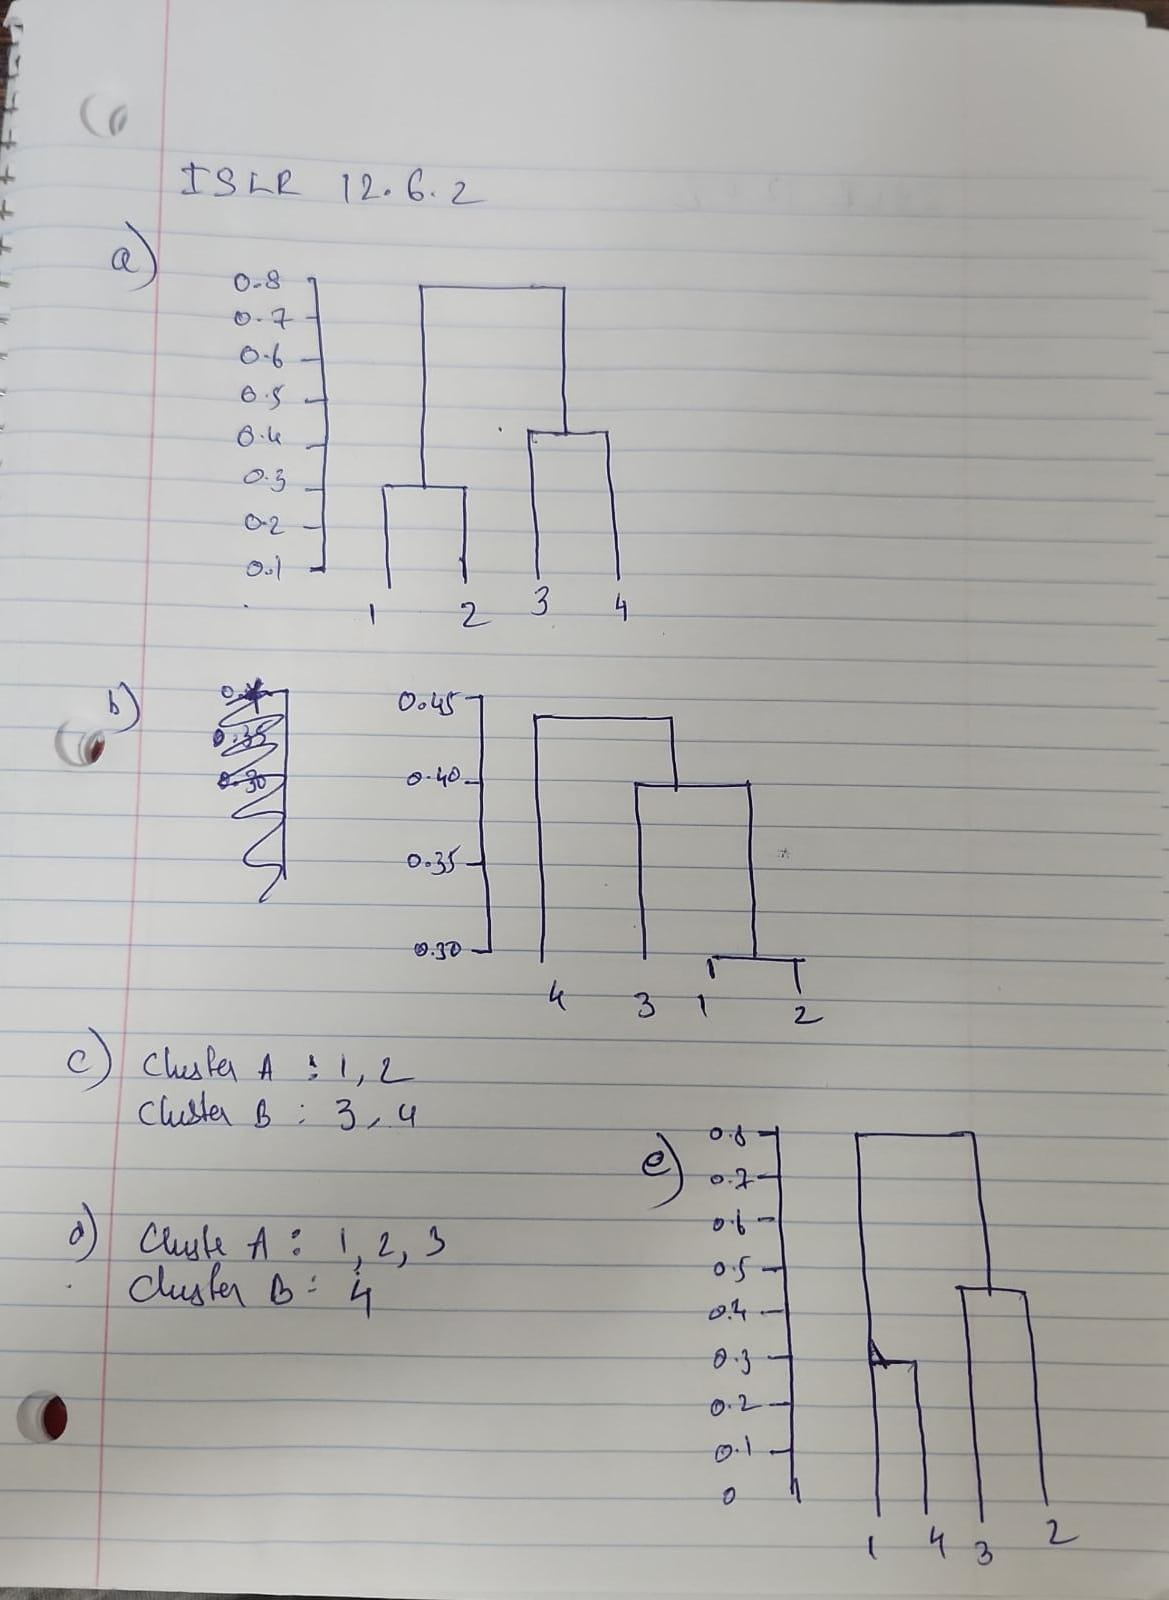

In [43]:
from IPython.display import Image
Image(filename='ISLR12.6.2.jpg')

## References 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html  
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html   
https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe  
https://realpython.com/k-means-clustering-python/  
https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/  